In [ ]:
pip install EasyOCR

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 31.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

Saving image_2003.jpg to image_2003.jpg


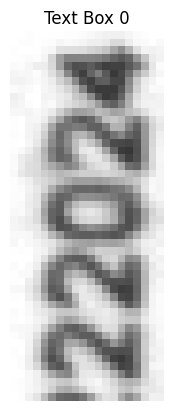

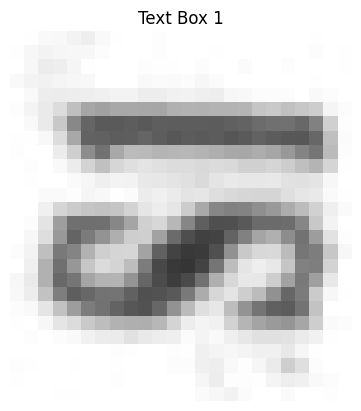

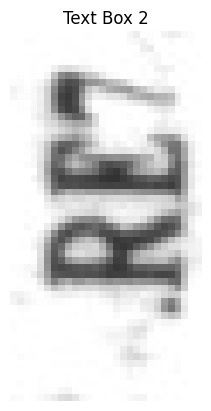

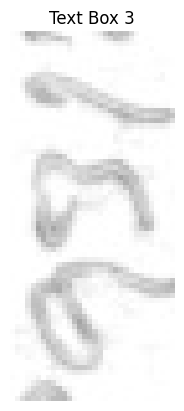

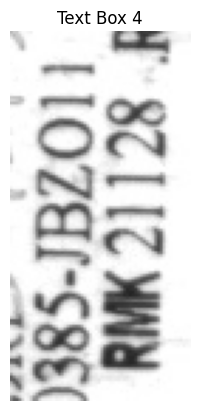

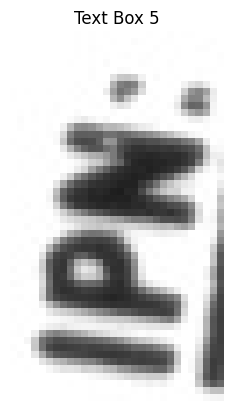

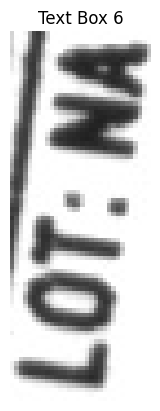

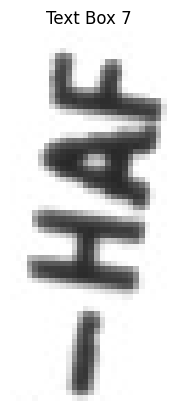

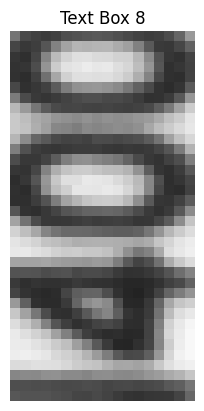

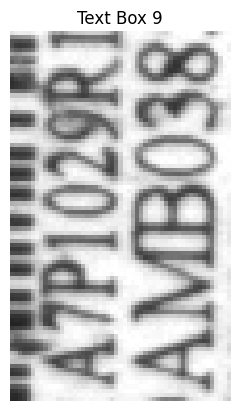

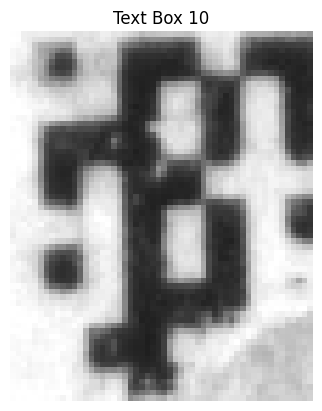

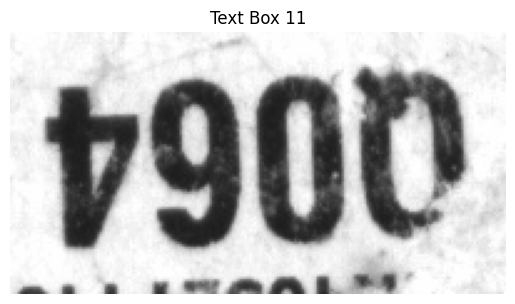

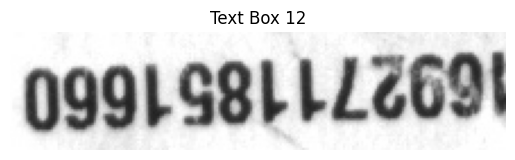

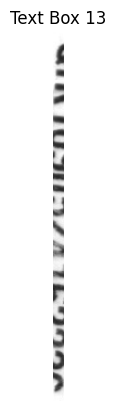

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import easyocr
from google.colab import files
import matplotlib.pyplot as plt

# Function to upload an image file
def upload_image_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Upload the image file
image_path = upload_image_file()
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Detect text boxes
result = reader.readtext(thresh)

# Cropped images
cropped_images = []

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    text_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    cropped_images.append(text_box)

# Displaying the cropped images
for i, cropped_image in enumerate(cropped_images):
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Text Box {i}')
    plt.axis('off')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving image_2006.jpg to image_2006.jpg


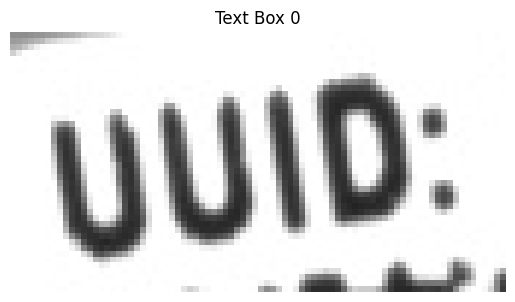

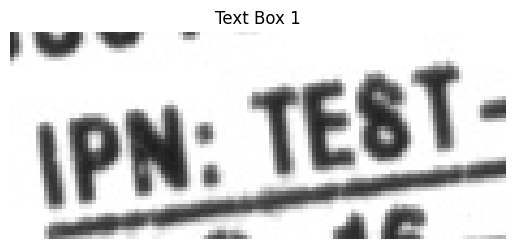

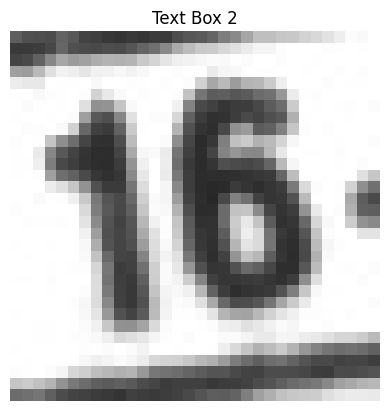

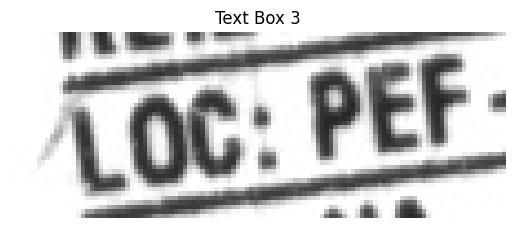

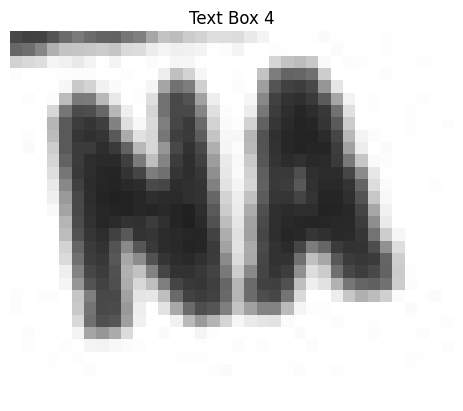

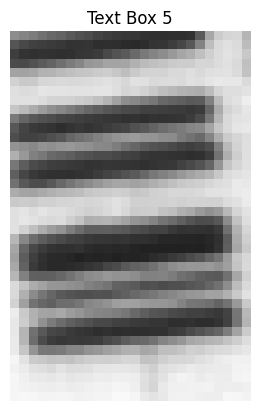

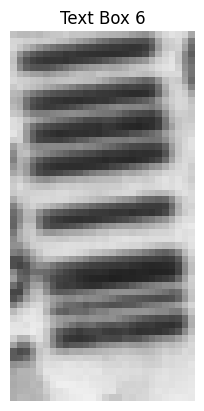

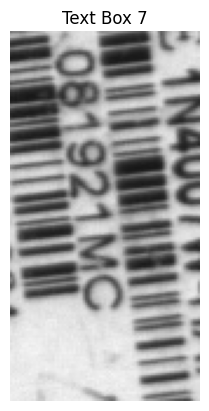

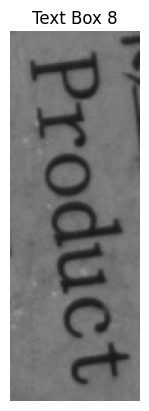

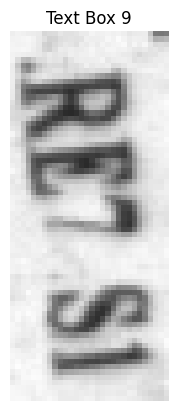

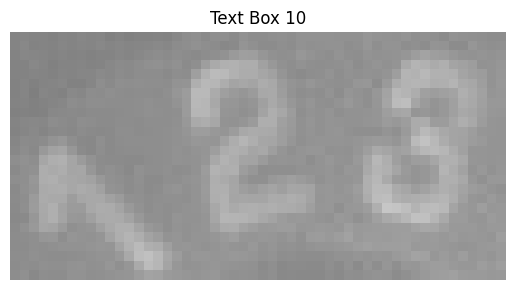

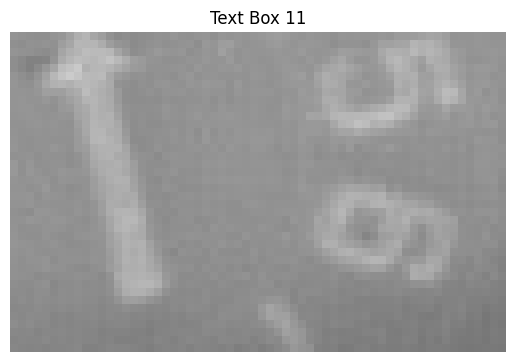

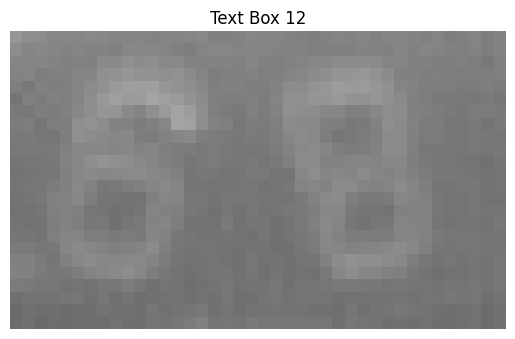

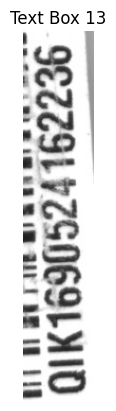

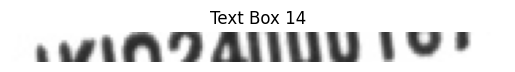

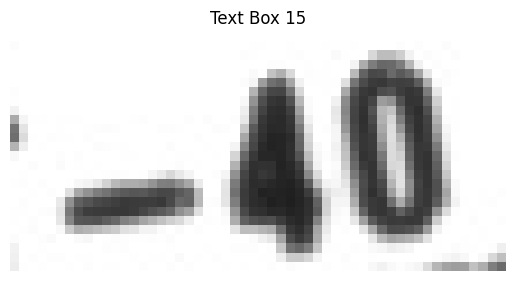

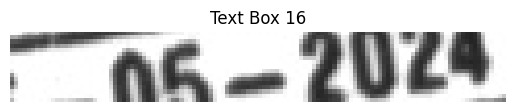

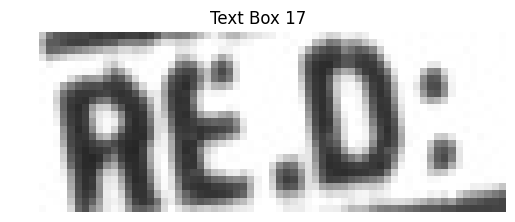

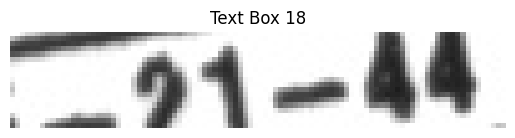

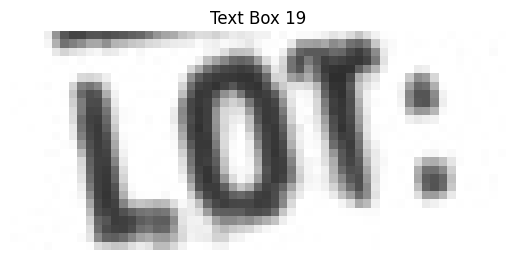

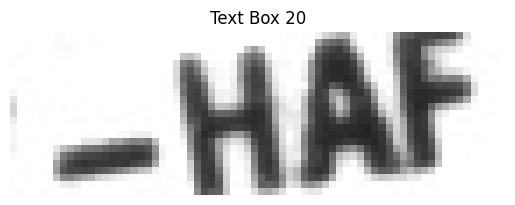

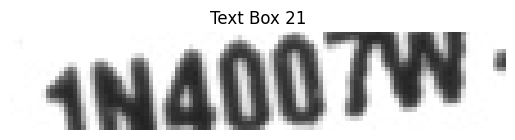

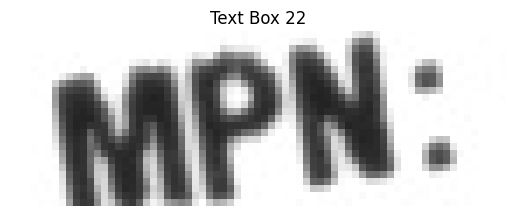

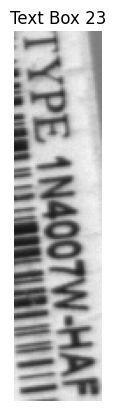

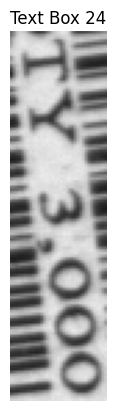

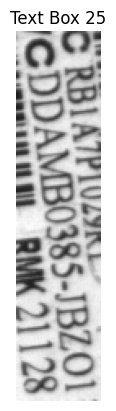

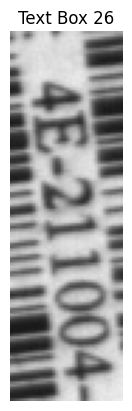

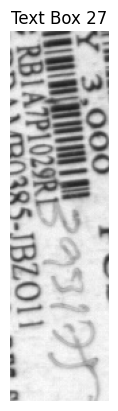

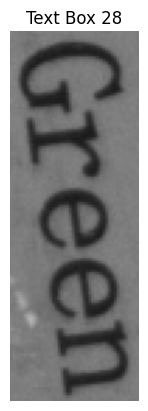

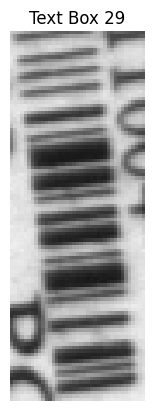

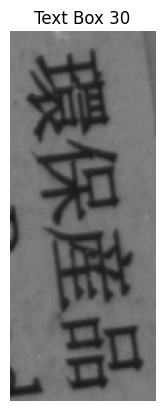

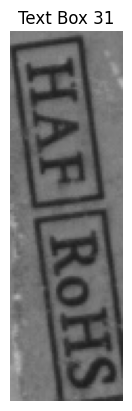

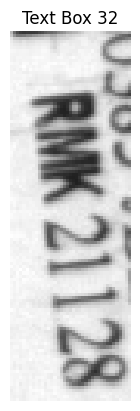

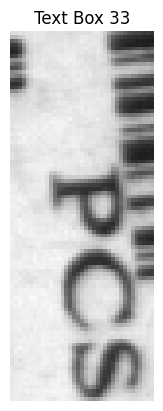

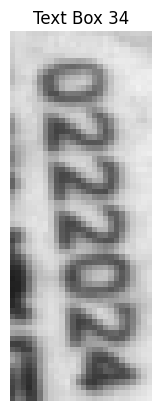

In [ ]:
import cv2
import numpy as np
import easyocr
from google.colab import files
import matplotlib.pyplot as plt

# Function to upload an image file
def upload_image_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Upload the image file
image_path = upload_image_file()
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Detect text boxes
result = reader.readtext(thresh)

# Cropped images
cropped_images = []

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    # Check if the bounding box is valid
    if top_left[0] < bottom_right[0] and top_left[1] < bottom_right[1]:
        text_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        cropped_images.append(text_box)
    else:
        print(f"Invalid bounding box: {bbox}")

# Displaying the cropped images
for i, cropped_image in enumerate(cropped_images):
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Text Box {i}')
    plt.axis('off')
    plt.show()

Saving image_2005.jpg to image_2005.jpg


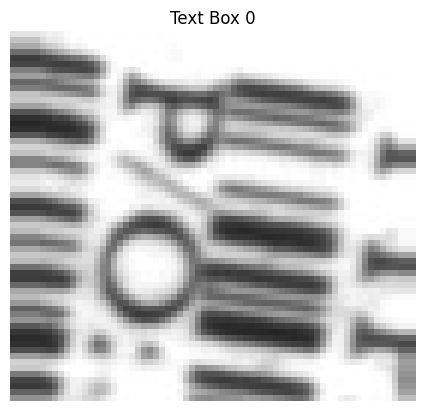

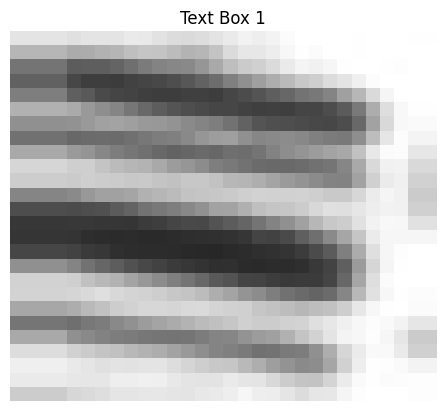

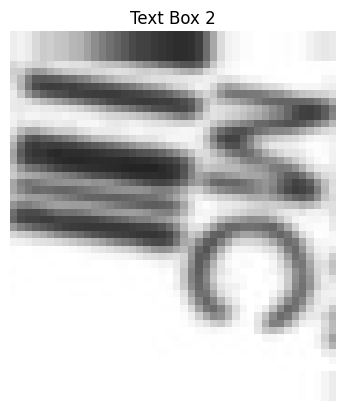

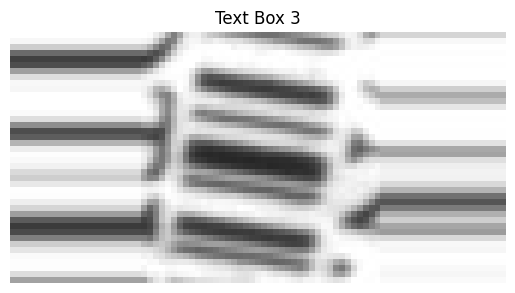

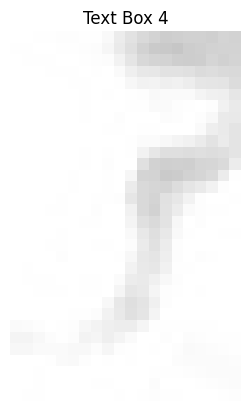

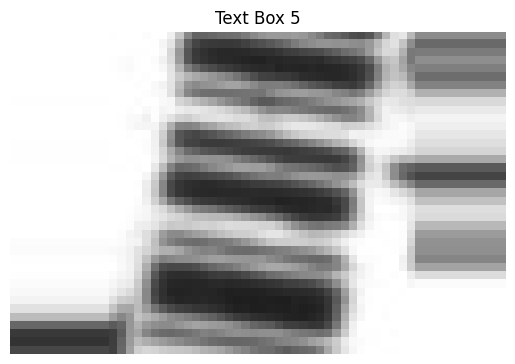

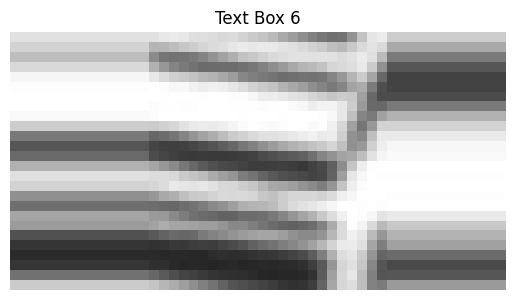

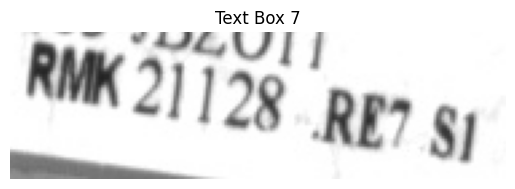

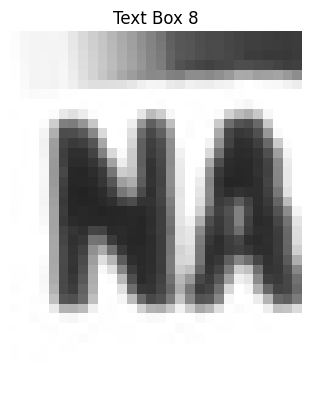

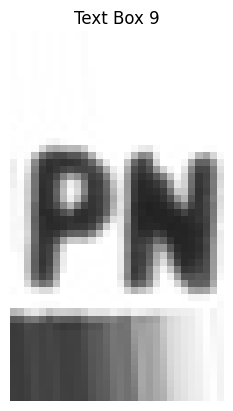

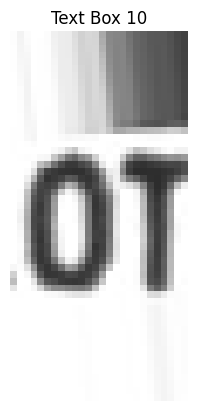

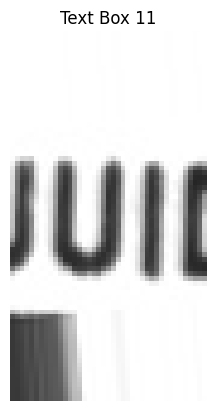

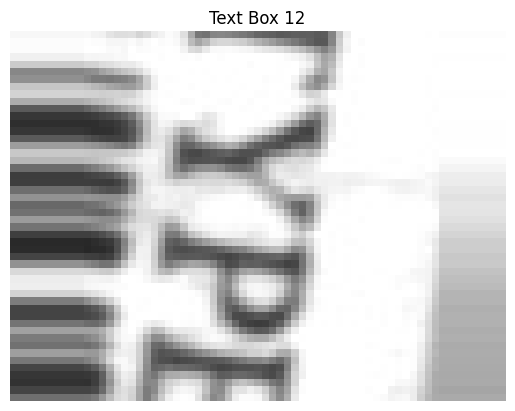

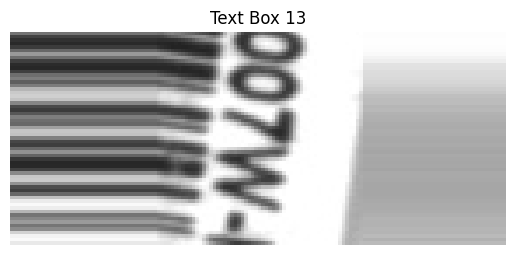

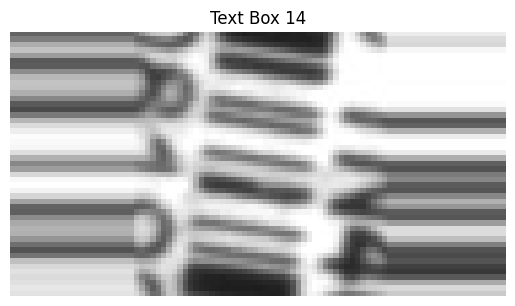

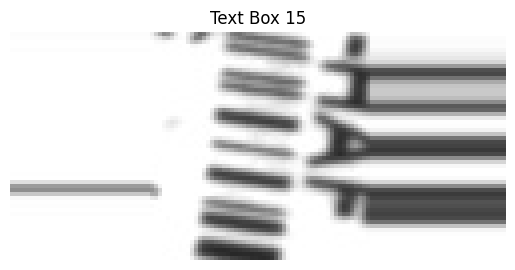

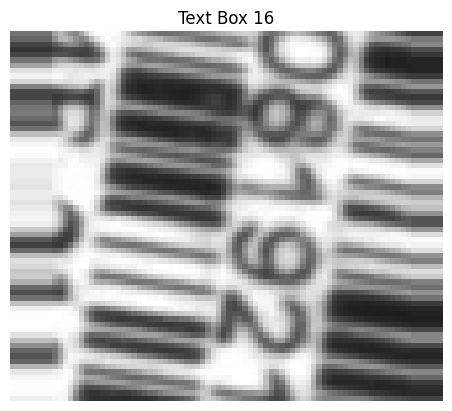

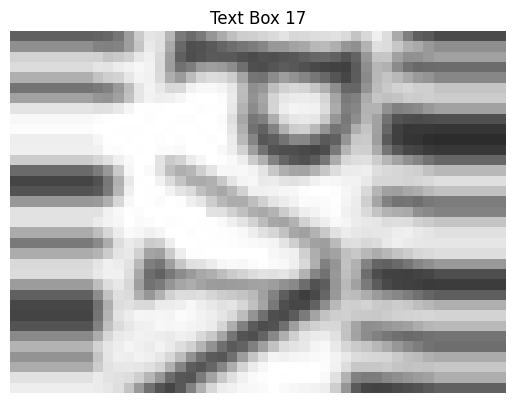

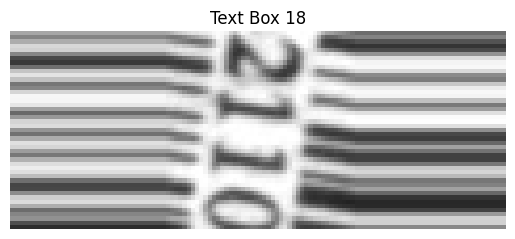

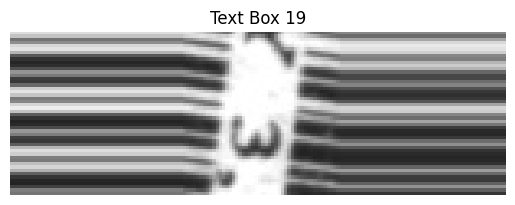

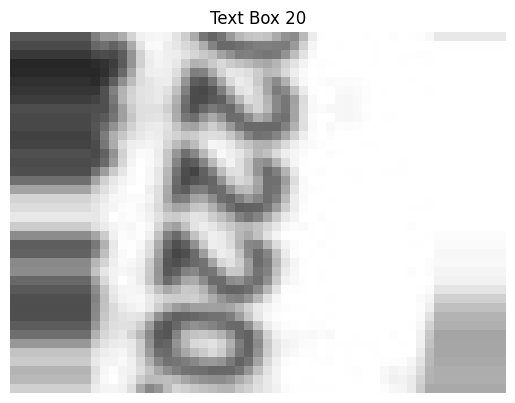

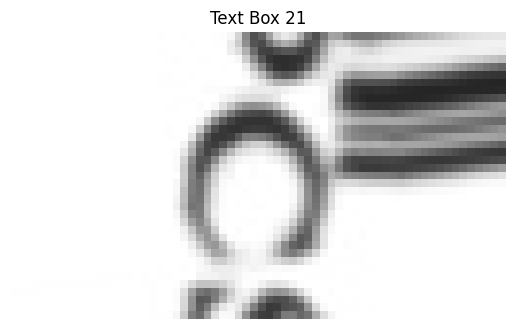

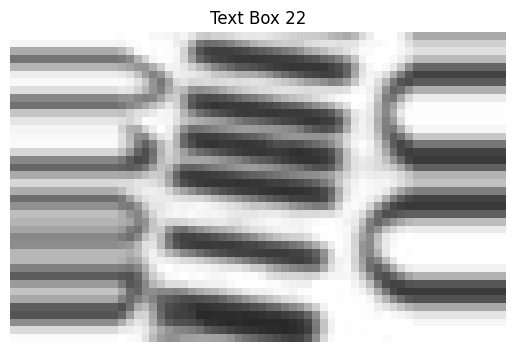

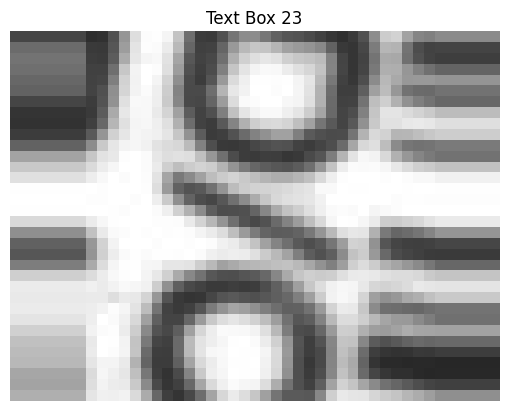

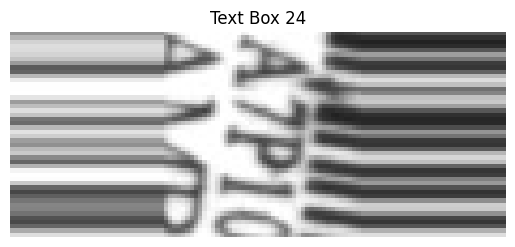

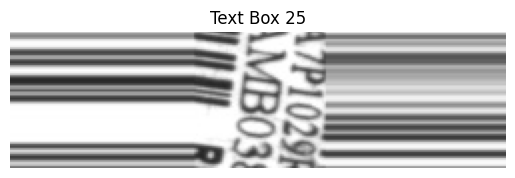

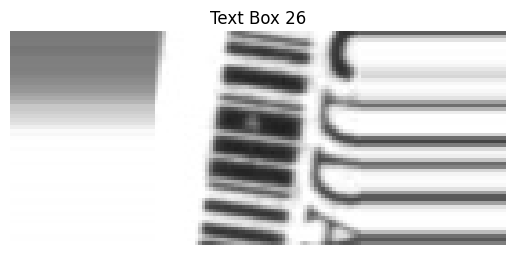

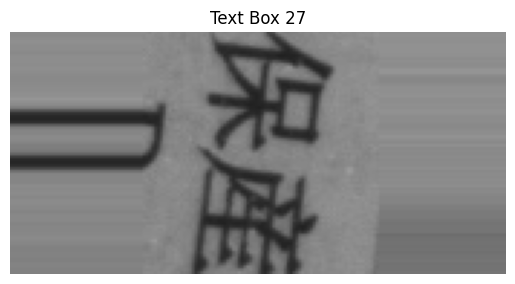

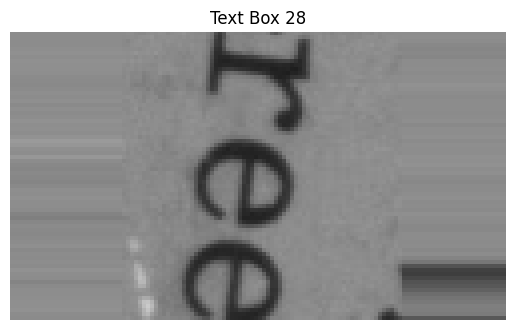

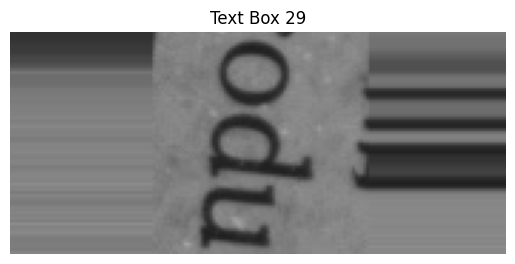

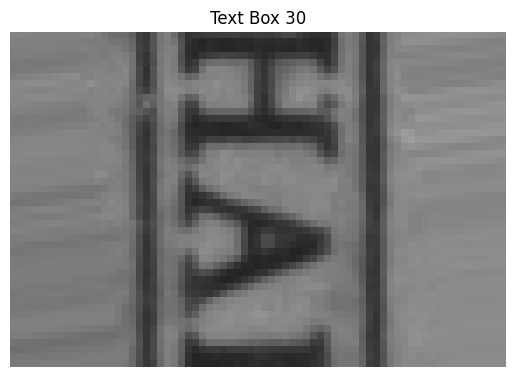

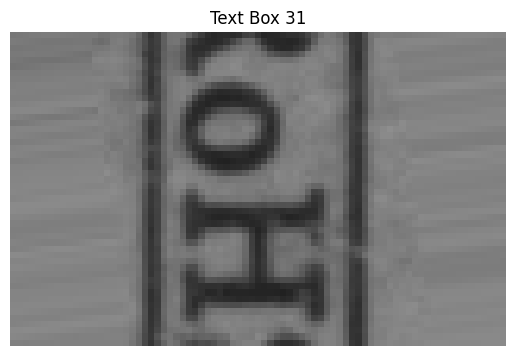

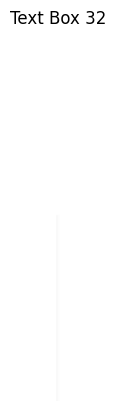

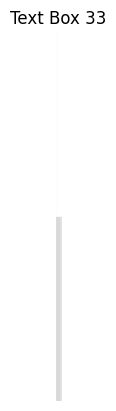

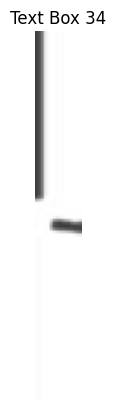

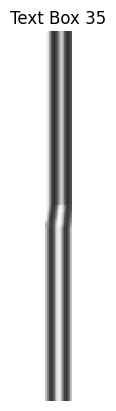

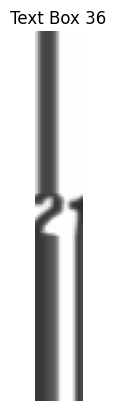

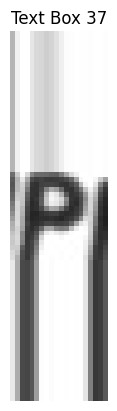

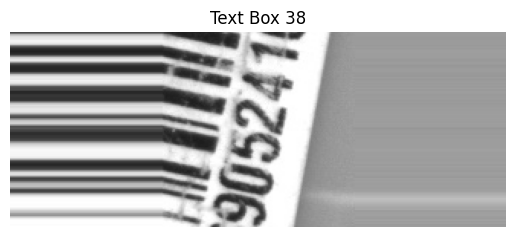

In [ ]:
import cv2
import numpy as np
import easyocr
from google.colab import files
import matplotlib.pyplot as plt

# Function to upload an image file
def upload_image_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Function to correct the orientation of the text box
def correct_orientation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

# Upload the image file
image_path = upload_image_file()
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Detect text boxes
result = reader.readtext(thresh)

# Cropped images
cropped_images = []

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    text_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    corrected_text_box = correct_orientation(text_box)
    cropped_images.append(corrected_text_box)

# Displaying the cropped images
for i, cropped_image in enumerate(cropped_images):
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Text Box {i}')
    plt.axis('off')
    plt.show()

Saving image_2000.jpg to image_2000.jpg
Saved label 1 to /mnt/data/extracted_labels/label_0.png
Saved label 2 to /mnt/data/extracted_labels/label_1.png
Saved label 3 to /mnt/data/extracted_labels/label_2.png
Saved label 4 to /mnt/data/extracted_labels/label_3.png
Saved label 5 to /mnt/data/extracted_labels/label_4.png
Saved label 6 to /mnt/data/extracted_labels/label_5.png
Saved label 7 to /mnt/data/extracted_labels/label_6.png
Saved label 8 to /mnt/data/extracted_labels/label_7.png
Saved label 9 to /mnt/data/extracted_labels/label_8.png
Saved label 10 to /mnt/data/extracted_labels/label_9.png
Saved label 11 to /mnt/data/extracted_labels/label_10.png
Saved label 12 to /mnt/data/extracted_labels/label_11.png
Saved label 13 to /mnt/data/extracted_labels/label_12.png
Saved label 14 to /mnt/data/extracted_labels/label_13.png
Saved label 15 to /mnt/data/extracted_labels/label_14.png
Saved label 16 to /mnt/data/extracted_labels/label_15.png
Saved label 17 to /mnt/data/extracted_labels/label_

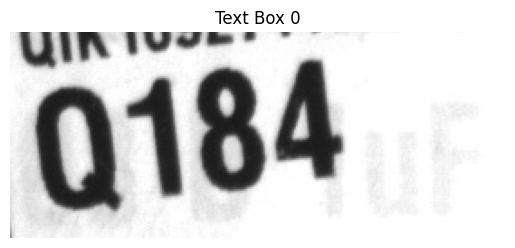

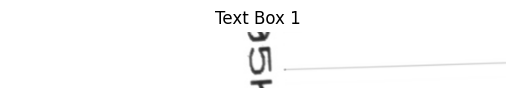

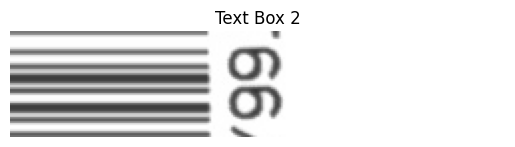

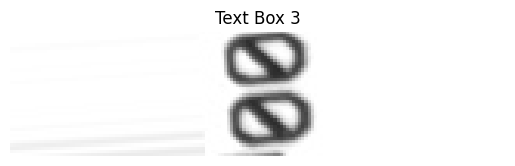

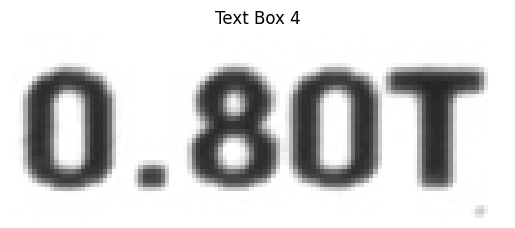

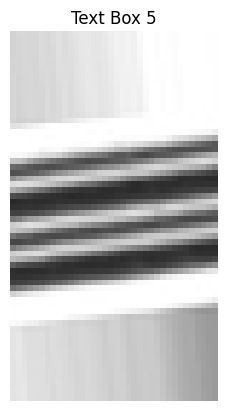

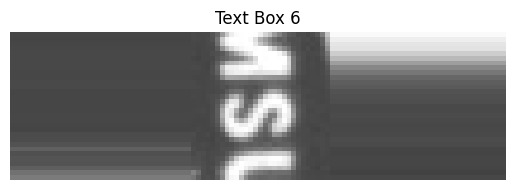

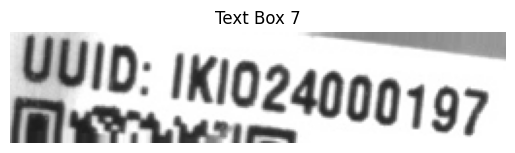

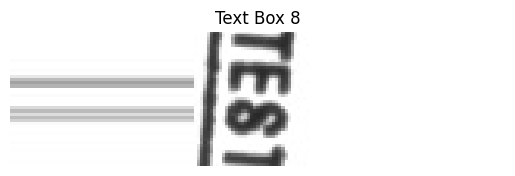

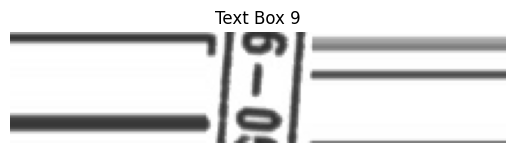

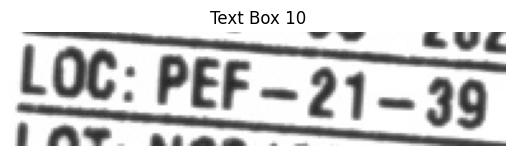

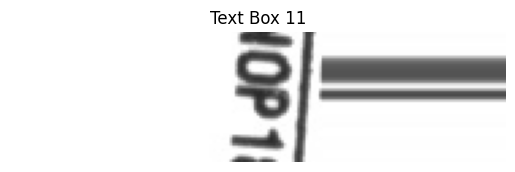

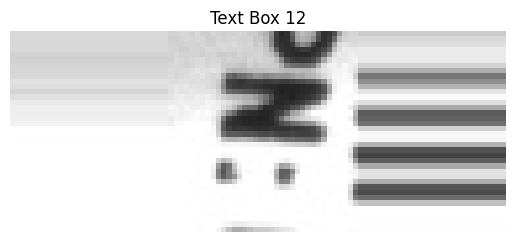

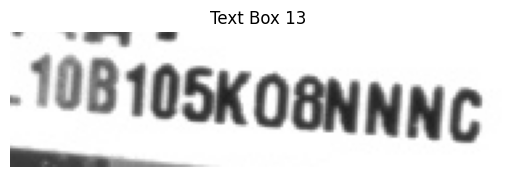

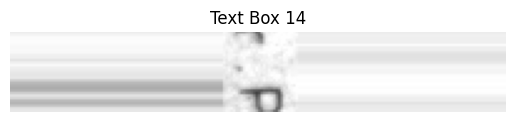

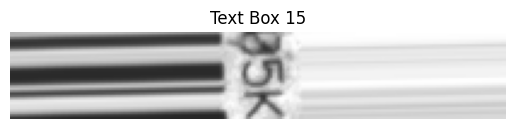

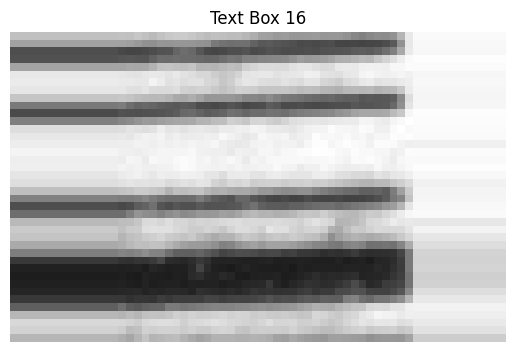

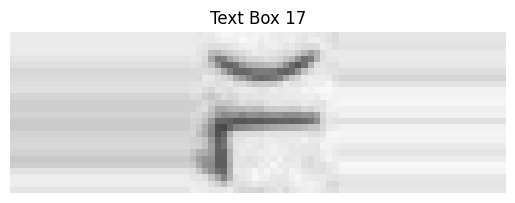

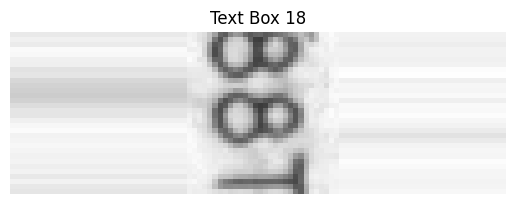

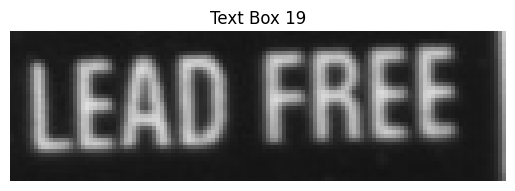

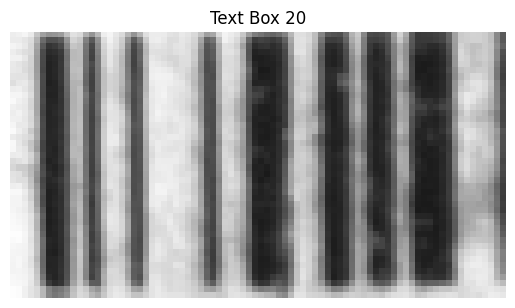

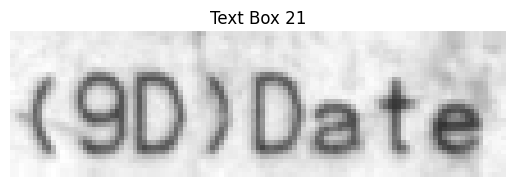

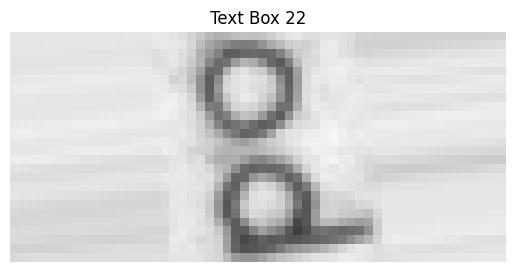

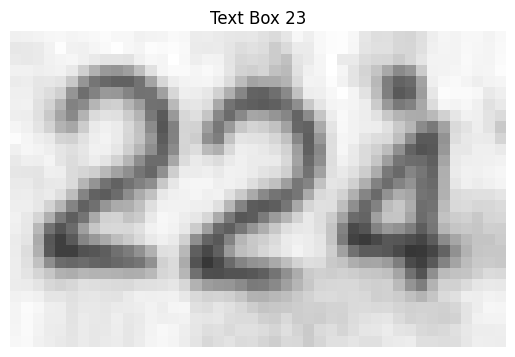

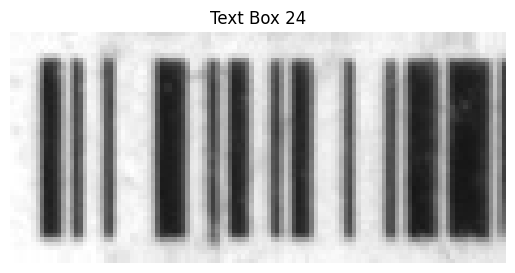

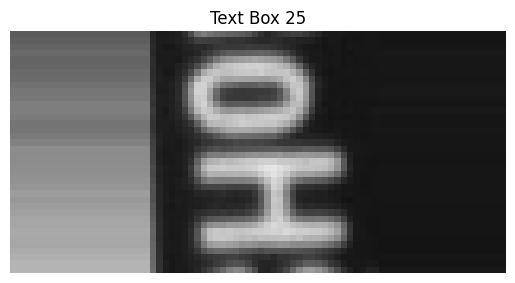

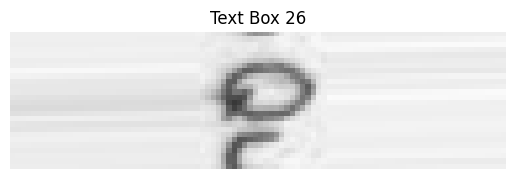

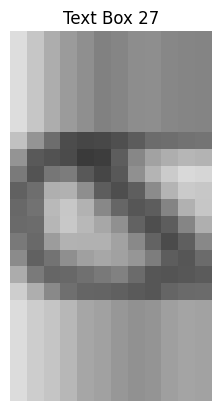

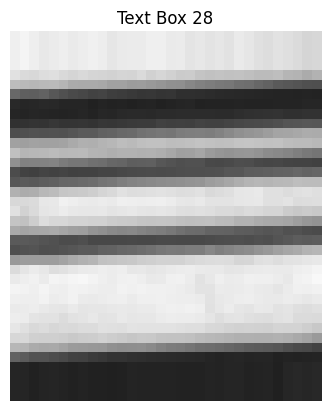

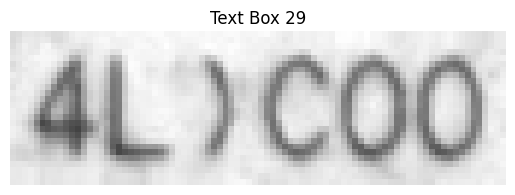

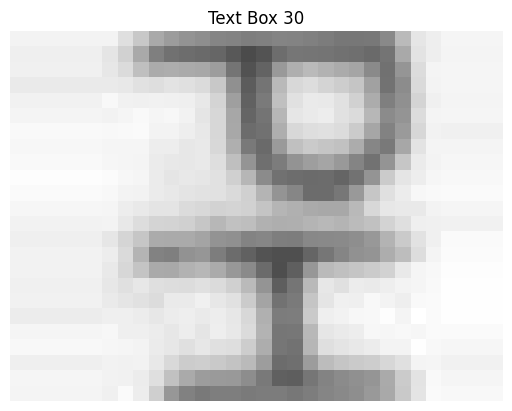

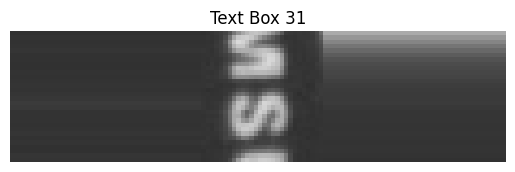

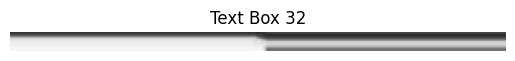

In [ ]:
import cv2
import numpy as np
import easyocr
from google.colab import files
import matplotlib.pyplot as plt
import os

def upload_image_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

def correct_orientation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

# Upload the image file
image_path = upload_image_file()
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Detect text boxes
result = reader.readtext(thresh)

# Create a folder to save the extracted labels
output_folder = "/mnt/data/extracted_labels"
os.makedirs(output_folder, exist_ok=True)

# Cropped images
cropped_images = []
label_count = 0

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    text_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    corrected_text_box = correct_orientation(text_box)
    cropped_images.append(corrected_text_box)

    # Save each label as a separate image
    label_path = f"{output_folder}/label_{label_count}.png"
    cv2.imwrite(label_path, corrected_text_box)
    label_count += 1

    print(f"Saved label {label_count} to {label_path}")

# Displaying the cropped images
for i, cropped_image in enumerate(cropped_images):
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Text Box {i}')
    plt.axis('off')
    plt.show()
